In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Parameters, minimize, report_fit

import scqubits as scq

In [3]:
def tmon(x, eigen, a, b):
    """Transmon lineshape."""
    transmon = scq.Transmon(EJ = 30.02,
                            EC = a,
                            ng = b,
                            ncut = 31)
    specdata = transmon.get_spectrum_vs_paramvals('EJ',
                                                  x,
                                                  evals_count = 4,
                                                  subtract_ground = True)
    model = specdata.energy_table[:,eigen]
    return model


def tmon_dataset(params, i, x):
    """Calculate Transmon lineshape from parameters for data set."""
    a = params['EC_%i' % (i+1)]
    b = params['ng_%i' % (i+1)]
    return tmon(x, i, a, b)


def objective(params, x, data):
    """Calculate total residual for fits of Transmons to several data sets."""
    ndata, _ = data.shape
    resid = 0.0*data[:]

    # make residual per data set
    for i in range(ndata):
        resid[i, :] = data[i, :] - tmon_dataset(params, i, x)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

In [4]:
x = np.linspace(0, 50, 50)
data = []
for _ in np.arange(4):
    params = Parameters()
    a, b = 1.5, 0.2
    dat = tmon(x, _, a, b) + np.random.normal(size=x.size, scale=0.5)
    data.append(dat)
data = np.array(data)

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

[[Variables]]
    EC_1:  1.00000000 (init = 1)
    ng_1:  0.30000000 (init = 0.3)
    EC_2:  1.50628967 (init = 1)
    ng_2:  0.22473656 (init = 0.3)
    EC_3:  1.49731899 (init = 1)
    ng_3:  0.20021580 (init = 0.3)
    EC_4:  1.49624900 (init = 1)
    ng_4:  0.20050322 (init = 0.3)


Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/50 [00:00<?, ?it/s]

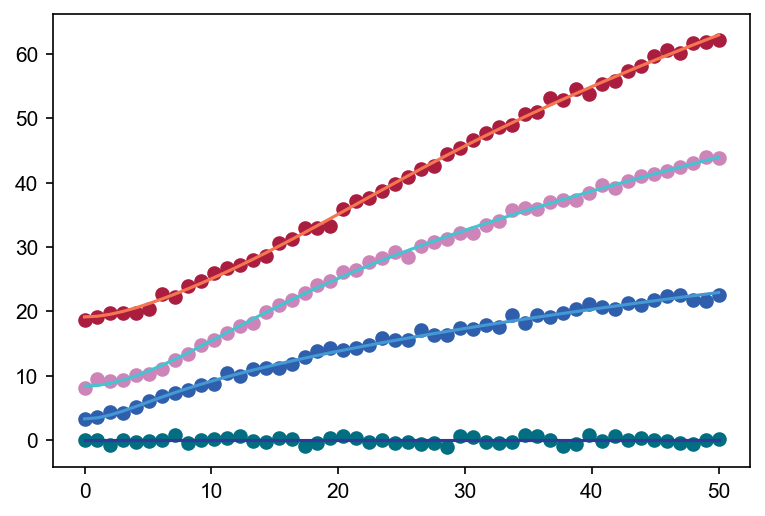

In [5]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('EC_%i' % (iy+1), value=1, min=0.0, max=2)
    fit_params.add('ng_%i' % (iy+1), value=0.3, min=0.0, max=0.5)
    
out = minimize(objective, fit_params, args=(x, data))
report_fit(out.params)

plt.figure()
for i in range(4):
    y_fit = tmon_dataset(out.params, i, x)
    plt.plot(x, data[i, :], 'o', x, y_fit, '-')
plt.show()